In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# check out table details
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
    #12 months prior date is 2016-08-23
# Perform a query to retrieve the data and precipitation scores

prcp_12mo = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
prcp_12mo


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_12mo, columns=['date','precipitation'])
prcp_df.set_index('date', inplace=True)
prcp_df

# Sort the dataframe by date
    #sorted via initial query in desc order

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


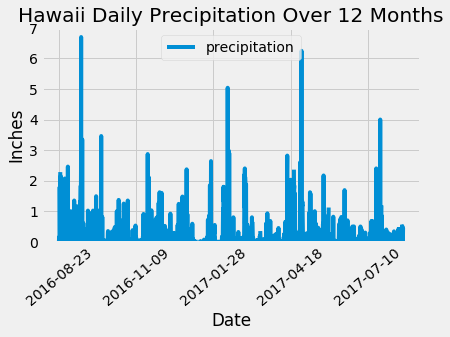

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
prcp_df.plot
plt.tight_layout()
plt.xticks(rotation=40)
plt.ylim(0,7)
plt.title("Hawaii Daily Precipitation Over 12 Months")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# check out table details
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.name).count()
print(total_stations)

9


In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
all_stations = session.query(measurement.station, func.count(measurement.id))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.id)).all()
all_stations

#most active sation is USC00519281

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_selection = [measurement.station,
                    func.min(measurement.tobs),
                    func.max(measurement.tobs),
                    func.avg(measurement.tobs)]
temp_summary = session.query(*station_selection).\
    filter(measurement.station == "USC00519281").\
    group_by(measurement.station)
for station in temp_summary:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


<function matplotlib.pyplot.show(*args, **kw)>

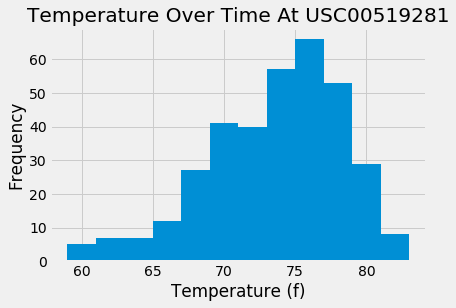

In [69]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_station_date = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date.desc()).first()
#most recent station date is 2017-8-18

#pull all dates
over12months = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date>= "2016-08-23").all()

twelvemonth_station_temps_df = pd.DataFrame(over12months, columns=["Date of Measurement", "Temperature"])
twelvemonth_station_temps_df.head()

plt.hist(twelvemonth_station_temps_df["Temperature"], bins=12, density=False)
plt.xlabel("Temperature (f)")
plt.ylabel("Frequency")
plt.title("Temperature Over Time At USC00519281")
plt.show

# Close session

In [70]:
# Close Session
session.close()